In [3]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

# # 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("font", family="AppleGothic") # 한글표시 (mac)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시


python 3.10.13 (main, Mar 12 2024, 15:59:23) [Clang 15.0.0 (clang-1500.1.0.2.5)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.8.3


## plot (different style)

### line style, color, and marker

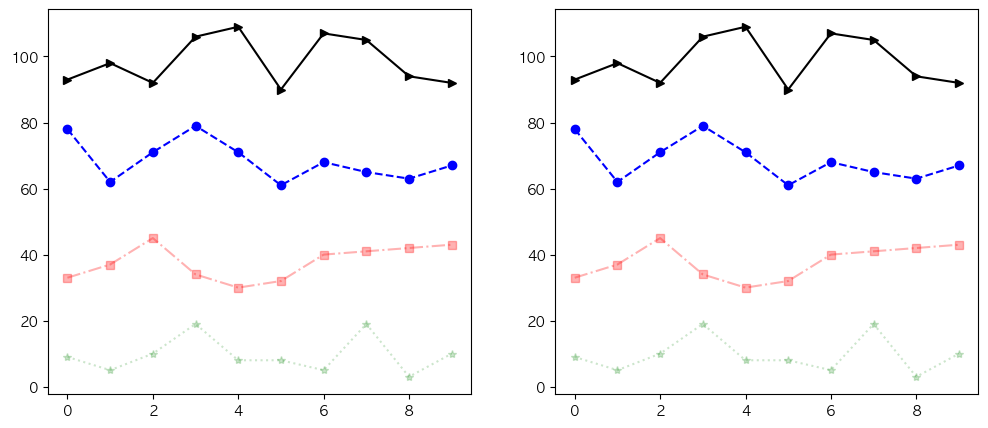

In [4]:
fig=plt.figure(figsize=(12,5), dpi=100)
ax1, ax2=fig.subplots(1,2)

X=np.arange(10)

Y1=np.random.randint(90,110,size=10)
Y2=np.random.randint(60,80,size=10)
Y3=np.random.randint(30,50,size=10)
Y4=np.random.randint(0,20,size=10)

# 좀 더 명시적으로
_=ax1.plot(X, Y1, color = 'k', linestyle='solid', marker='>')
_=ax1.plot(X, Y2, color = 'b', linestyle='dashed', marker='o')
_=ax1.plot(X, Y3, color = 'r', linestyle='dashdot', marker='s', alpha=0.3)
_=ax1.plot(X, Y4, color = 'g', linestyle='dotted', marker='*', alpha=0.2)

# 축약형
_=ax2.plot(X, Y1, 'k->')
_=ax2.plot(X, Y2, 'b--o')
_=ax2.plot(X, Y3, 'r-.s', alpha=0.3)
_=ax2.plot(X, Y4, 'g:*', alpha=0.2)

### markevery 파라미터

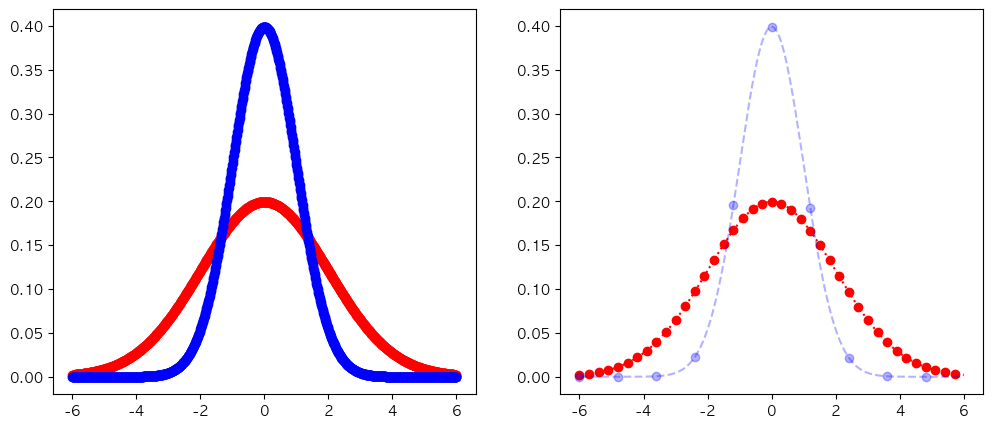

In [11]:
fig=plt.figure(figsize=(12,5), dpi=100)
ax1, ax2=fig.subplots(1,2)

def pdf(X, mu, sigma):
    a = 1/(sigma * np.sqrt(2*np.pi))
    b = -1/(2*(sigma**2))
    return a * np.exp(b * ((X - mu)** 2))

X=np.linspace(-6,6,1000)

## ax1
Y=pdf(X, 0, 2)
_=ax1.plot(X, Y,'o:r')
Y=pdf(X, 0, 1)
_=ax1.plot(X, Y, 'o--b')

## ax2
Y=pdf(X, 0, 2)
_=ax2.plot(X, Y,'o:r', markevery=25) # 25 마다 마커 찍음
Y=pdf(X, 0, 1)
_=ax2.plot(X, Y, 'o--b', markevery=1000//10, alpha=0.3)


## scatter (different style)

### 실습1

array([['.', ',', 'o', 'v'],
       ['^', '<', '>', '8'],
       ['s', 'p', 'P', '*']], dtype='<U1')

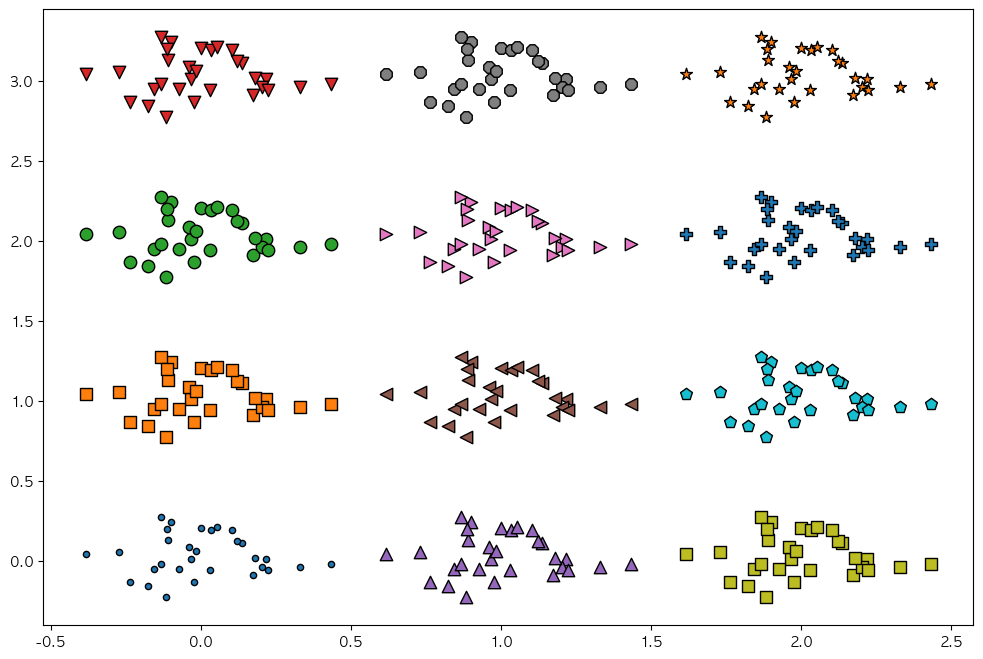

In [18]:
marks = np.array(['.', ',', 'o', 'v', '^', '<', '>', '8','s','p','P','*']).reshape(3,4)
marks

fig=plt.figure(figsize=(12,8), dpi=100)
ax=fig.subplots()

A=np.random.normal(0,0.15,size=(30,2))

## 코드작성
for i in range(3):
    for j in range(4):
        _=ax.scatter(A[:,0]+i,A[:,1]+j,marker=marks[i,j],edgecolor='k',s=80)

### marker 사용 예제

,sep_len,sep_wid,pet_len,pet_wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


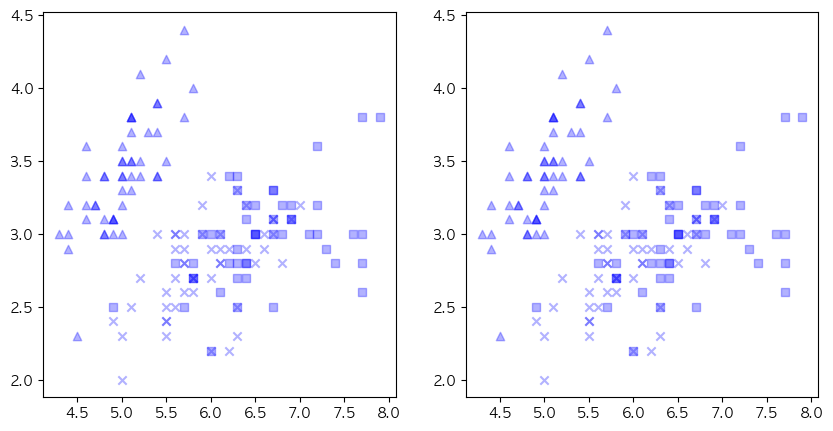

In [19]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax1, ax2=fig.subplots(1,2)

data = pd.read_table('data/dat_iris.txt', sep=',')
data
## ax1
for mark, label in zip(['^','x','s'],['Iris-setosa','Iris-versicolor','Iris-virginica']):
    d1=data.loc[data['name']==label]
    ax1.scatter(d1['sep_len'], d1['sep_wid'], marker=mark, color='b', alpha=0.3)
    
## ax2
marker_dic={'Iris-setosa':'^', 'Iris-versicolor':'x', 'Iris-virginica':'s'}
for ind in data.index:
    row1=data.loc[ind]
    mark=marker_dic[row1['name']]
    _=ax2.scatter(row1['sep_len'], row1['sep_wid'], marker=mark, color='b', alpha=0.3)

### 실습2

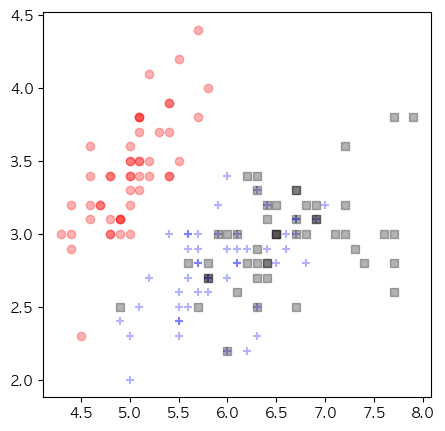

In [22]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/dat_iris.txt', sep=',')

## 코드작성
for col, mark, label in zip(['r','b','k'],['o','+','s'],['Iris-setosa','Iris-versicolor','Iris-virginica']):
    df1 = data.loc[data['name']==label]
    ax.scatter(df1['sep_len'],df1['sep_wid'],marker=mark,color=col,alpha=0.3)

### 표식 크기 제어

array([[-2.15904427, -1.31872803],
       [ 0.37948801,  0.07099082]])

array([6.4005158 , 0.14905084])

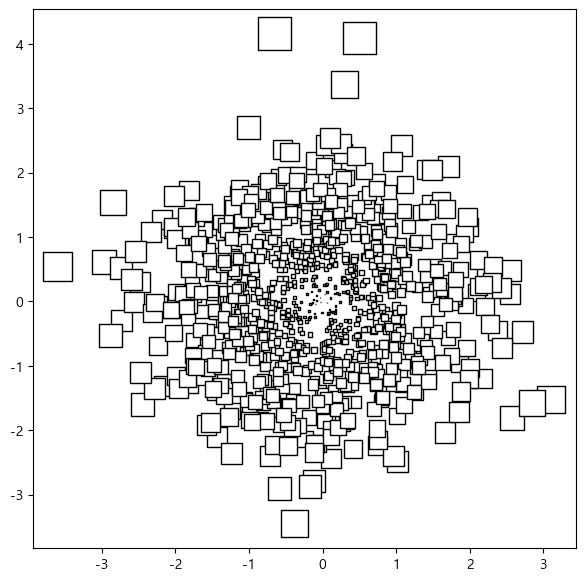

In [18]:
M=np.random.normal(0,1, size=(1000,2))
R=np.sum(M**2, axis=1) # n 행의 점과 원점 사이의 거리 제곱
M[:2,]
R[:2]

fig=plt.figure(figsize=(7,7), dpi=100)
ax=fig.subplots()

_=ax.scatter(M[:,0], M[:,1], c='w', edgecolor='k',marker='s', s=32*R) # 원점과 멀수록 크기가 커짐

### 실습3

,x,y,price
0,94,27,24
1,4,5,29
2,39,14,14
3,98,76,15
4,56,37,15


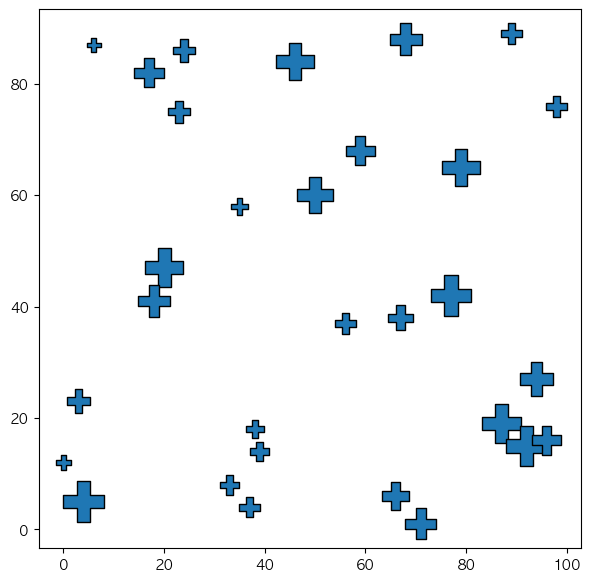

In [27]:
fig=plt.figure(figsize=(7,7), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/xy_price.txt', sep='\t')
data.head()

## 코드작성
_=ax.scatter(data['x'],data['y'],marker='P',s=data['price']**2,edgecolors='k')

### 실습4

,x,y,price
0,94,27,24
1,4,5,29
2,39,14,14
3,98,76,15
4,56,37,15


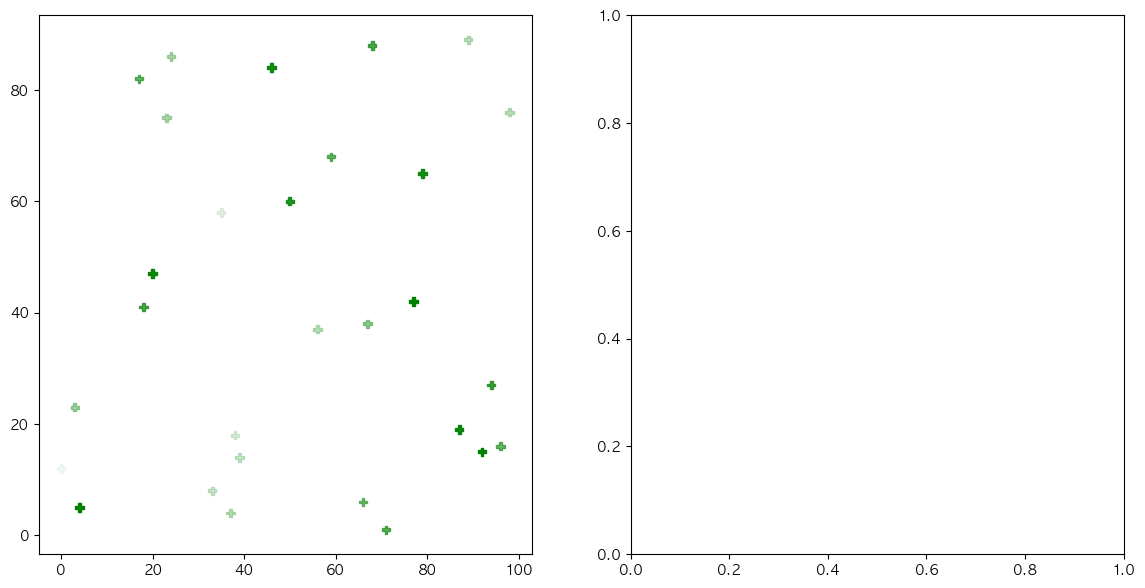

In [33]:
fig=plt.figure(figsize=(14,7), dpi=100)
ax1, ax2=fig.subplots(1,2)

data = pd.read_table('data/xy_price.txt', sep='\t')
data.head()

## 코드작성
alpha_list = (data['price']-min(data['price']))/max(data['price']-min(data['price']))
ax1.scatter(data['x'],data['y'],color='g',marker='P',alpha=alpha_list)

### 실습5

,x,y,price
0,94,27,24
1,4,5,29
2,39,14,14
3,98,76,15
4,56,37,15


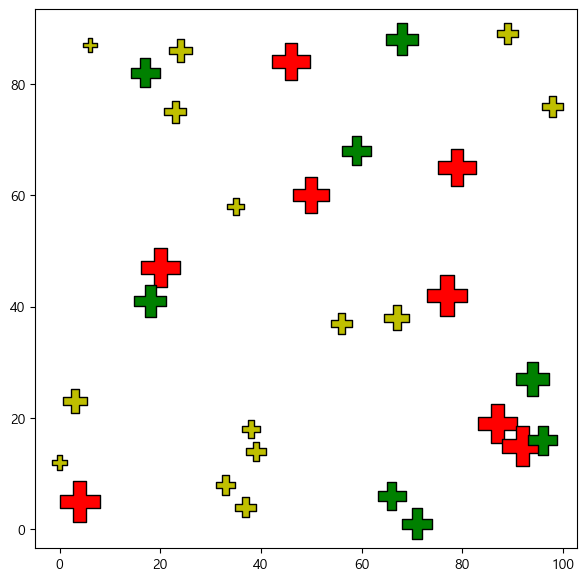

In [63]:
fig=plt.figure(figsize=(7,7), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/xy_price.txt', sep='\t')
data.head()

color_list=[]

## 코드작성


## ======== 실습풀이

### 실습1

array([['.', ',', 'o', 'v'],
       ['^', '<', '>', '8'],
       ['s', 'p', 'P', '*']], dtype='<U1')

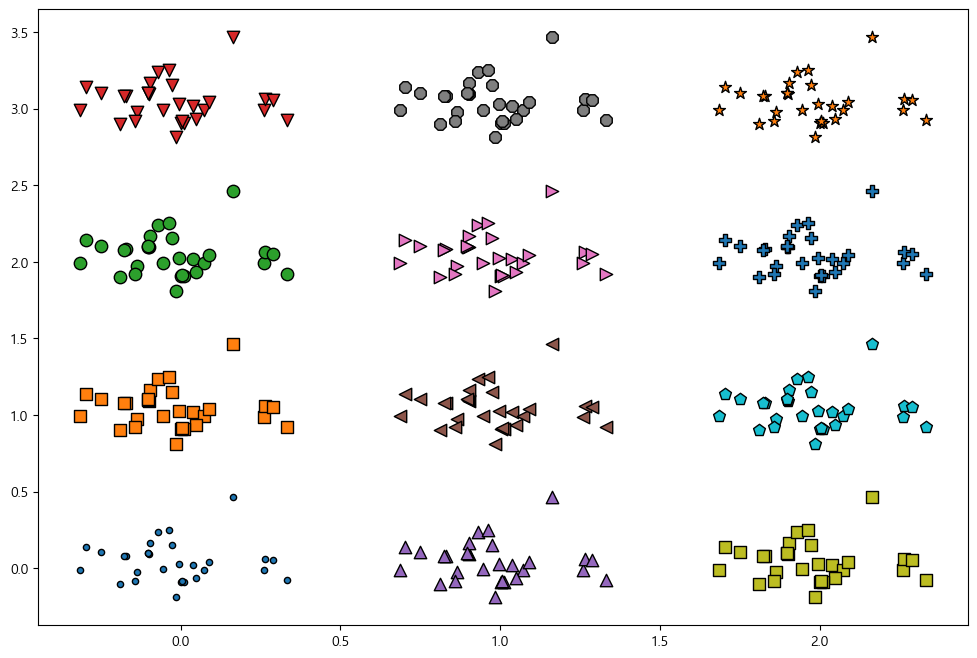

In [7]:
marks = np.array(['.', ',', 'o', 'v', '^', '<', '>', '8','s','p','P','*']).reshape(3,4)
marks

fig=plt.figure(figsize=(12,8), dpi=100)
ax=fig.subplots()

A=np.random.normal(0,0.15,size=(30,2))

## 코드작성
for ii in range(3):
    for jj in range(4):
        _=ax.scatter(A[:,0]+ii,A[:,1]+jj, edgecolor='k',marker=marks[ii, jj], s=80)

### 실습2

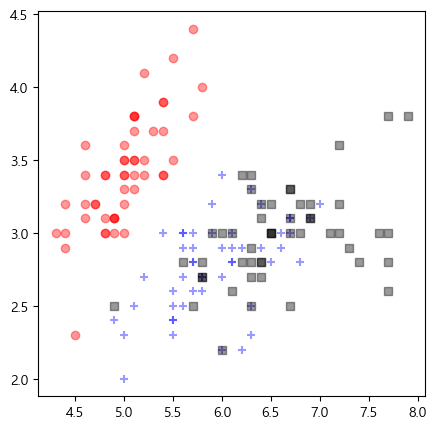

In [22]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/dat_iris.txt', sep=',')

## 코드작성
for col, mark, label in zip(['r','b','k'],['o','+','s'],['Iris-setosa','Iris-versicolor','Iris-virginica']):
    d1=data.loc[data['name']==label]
    ax.scatter(d1['sep_len'], d1['sep_wid'], marker=mark, color=col, alpha=0.4)

### 실습3

,x,y,price
0,94,27,24
1,4,5,29
2,39,14,14
3,98,76,15
4,56,37,15


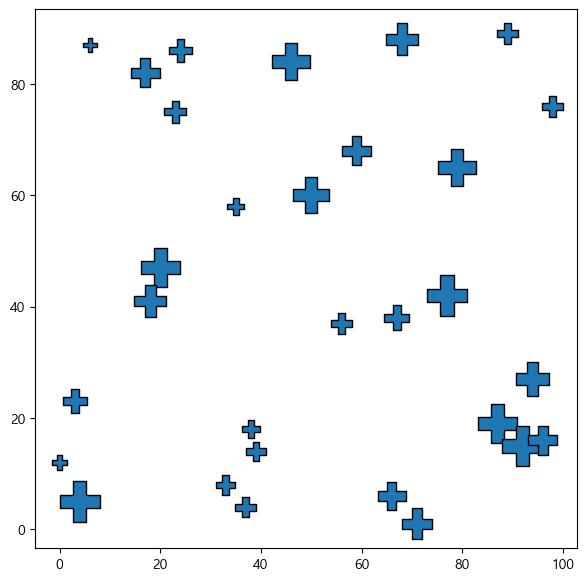

In [23]:
fig=plt.figure(figsize=(7,7), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/xy_price.txt', sep='\t')
data.head()

## 코드작성
ax.scatter(data['x'], data['y'], marker='P', edgecolor='k',s=data['price']**2)

### 실습4

,x,y,price
0,94,27,24
1,4,5,29
2,39,14,14
3,98,76,15
4,56,37,15


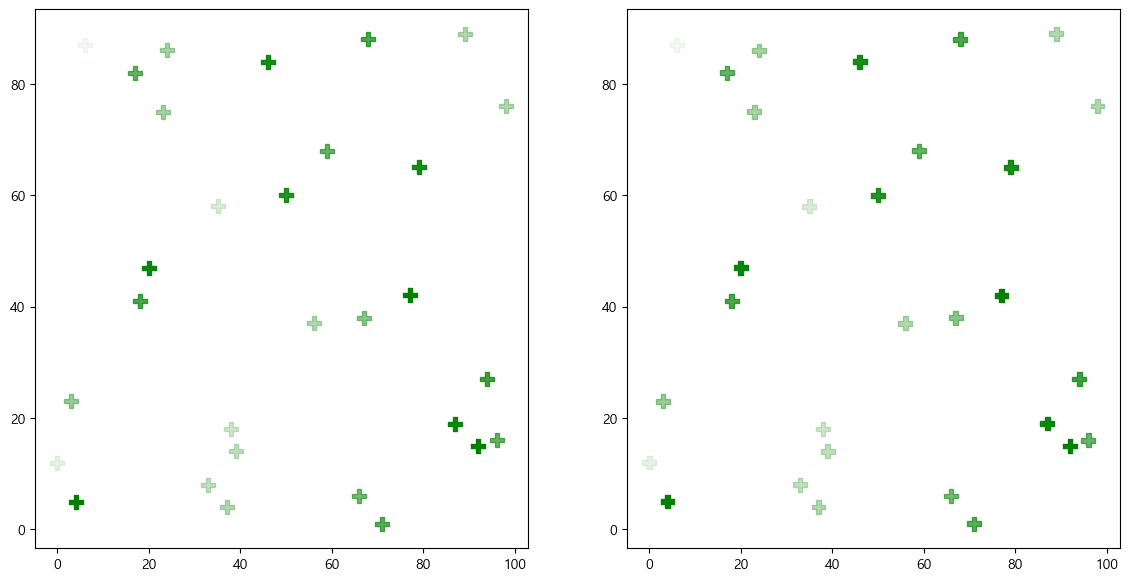

In [25]:
fig=plt.figure(figsize=(14,7), dpi=100)
ax1, ax2=fig.subplots(1,2)

data = pd.read_table('data/xy_price.txt', sep='\t')
data.head()

## 코드작성
mx=np.max(data['price'])
mn=np.min(data['price'])

for ii in range(len(data)):
    row=data.iloc[ii]
    x=row['x']
    y=row['y']
    p=row['price']
    _=ax1.scatter(x, y, marker='P', color='g', s=100, alpha=(p-mn+1)/(mx-mn+1))

##
_=ax2.scatter(data['x'], data['y'], marker='P', color='g', s=100, alpha=(data['price']-mn+1)/(mx-mn+1))    

### 실습5

,x,y,price
0,94,27,24
1,4,5,29
2,39,14,14
3,98,76,15
4,56,37,15


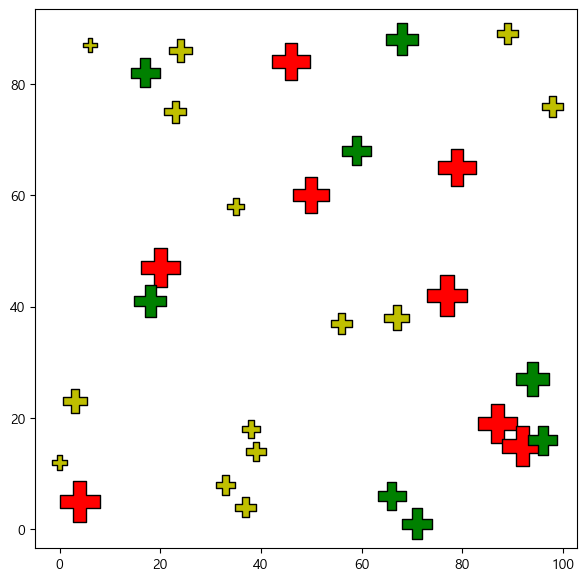

In [21]:
fig=plt.figure(figsize=(7,7), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/xy_price.txt', sep='\t')
data.head()

color_list=[]

## 코드작성
for p in data['price']:
    if p>=25:
        col='r'
    elif p>=20:
        col='g'
    else:
        col='y'
    color_list.append(col)

ax.scatter(data['x'], data['y'], marker='P', color=color_list, edgecolor='k',s=data['price']**2)